In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer  # For missing value imputation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt  # Import matplotlib for plotting
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

In [2]:
# Define col_names before using it
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

# Read the Pima Indians diabetes dataset
pima = pd.read_csv("pima-indians-diabetes.csv", header=None, names=col_names)

# Define the features you want to use
feature_cols = ['pregnant', 'glucose', 'bp', 'insulin', 'bmi', 'pedigree', 'age']

In [3]:
# Handle missing values (if any)
imputer = SimpleImputer(strategy='mean')  # Replace with 'median' if appropriate
pima_imputed = pd.DataFrame(imputer.fit_transform(pima), columns=col_names)  # Convert the numpy array back to a DataFrame

In [4]:
# Select features using method 1: Using `[]` for Column Selection
X = pima_imputed[feature_cols]  # Select features by column names

# Extract the target variable
y = pima_imputed['label']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [5]:
# Hyperparameter tuning with GridSearchCV using 10-fold cross-validation
param_grid = {
    'max_depth': [3, 5, 8],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

In [6]:
estimator = RandomForestRegressor(n_estimators=100, random_state=42)

# Initialize RFE
rfe = RFE(estimator, n_features_to_select=7)  

# Fit RFE to data
rfe.fit(X_train, y_train)

# Get selected features
selected_features = rfe.get_support(indices=True)
print(selected_features)
#Print selected feature names
print("Selected features:")
for feature_index in selected_features:
    print(X.columns[feature_index])

[0 1 2 3 4 5 6]
Selected features:
pregnant
glucose
bp
insulin
bmi
pedigree
age


In [7]:
clf = DecisionTreeClassifier()
grid_search = GridSearchCV(clf, param_grid, scoring='accuracy', cv=10)# Specify 10 folds 
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)


Accuracy with Hyperparameter Tuning: 0.7662337662337663


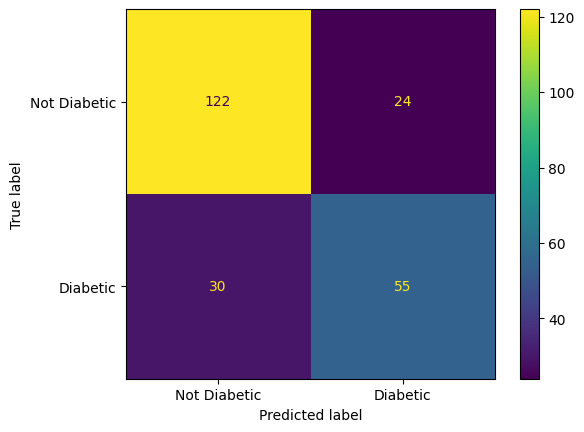

              precision    recall  f1-score   support

         0.0       0.80      0.84      0.82       146
         1.0       0.70      0.65      0.67        85

    accuracy                           0.77       231
   macro avg       0.75      0.74      0.74       231
weighted avg       0.76      0.77      0.76       231



In [8]:
# Print accuracy with hyperparameter tuning
print("Accuracy with Hyperparameter Tuning:", accuracy_score(y_test, y_pred))
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Diabetic', 'Diabetic'])
disp.plot()
plt.show()
# Print the classification report
print(classification_report(y_test, y_pred))

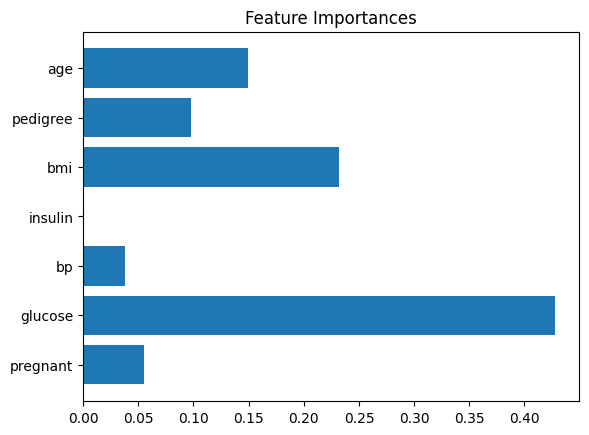

In [9]:
# Note: Decision trees do not have a loss curve like neural networks or some iterative models.
# However, you can plot feature importance as a bar graph to understand the contribution of each feature.
feature_importances = best_model.feature_importances_
plt.barh(feature_cols, feature_importances)
plt.title('Feature Importances')
plt.show()

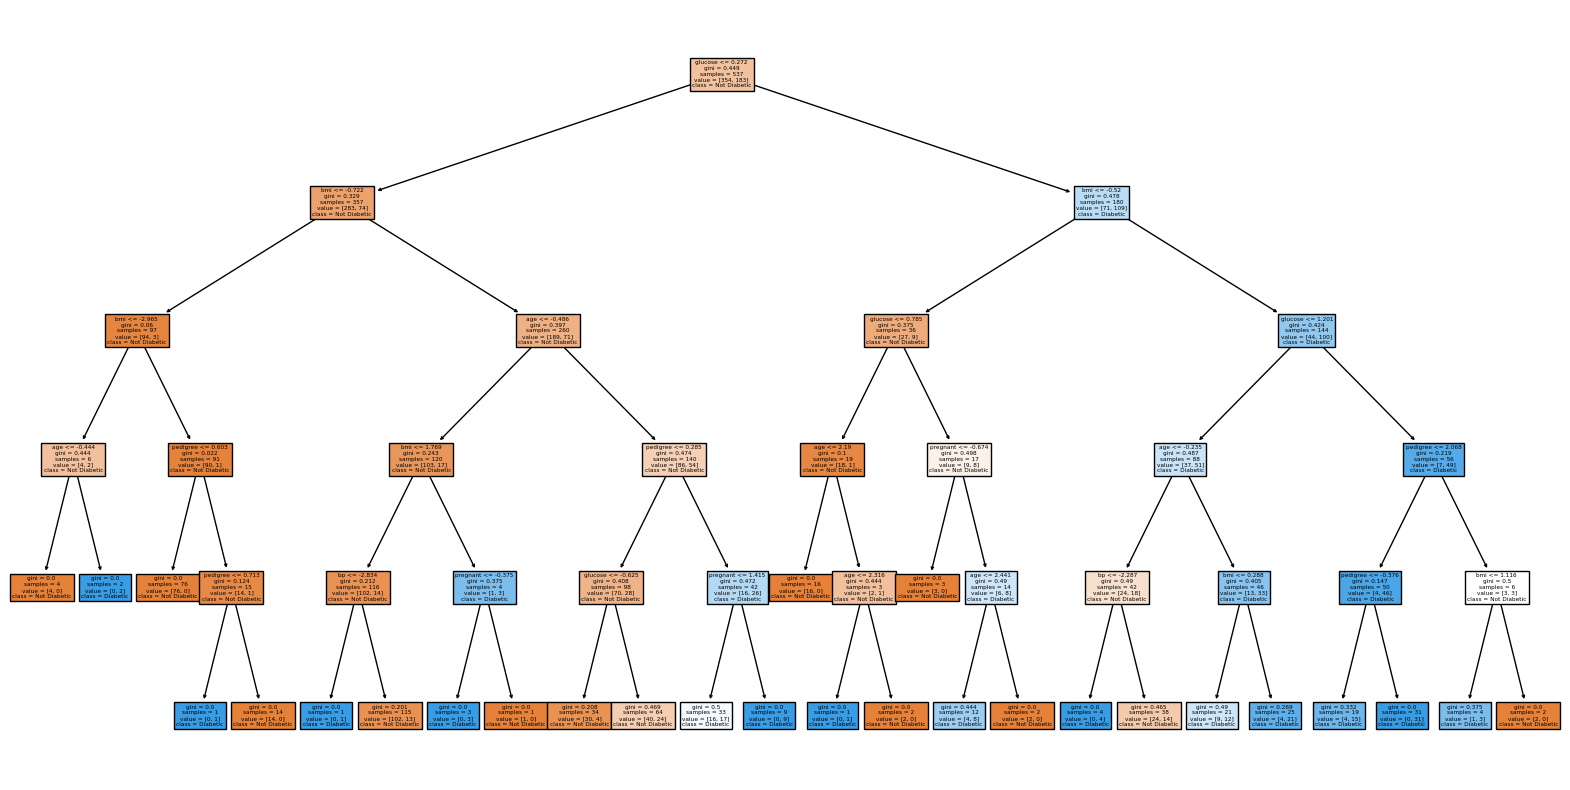

In [10]:
# After fitting the best model, plot the tree
plt.figure(figsize=(20,10))  # Set the size of the figure
plot_tree(best_model, filled=True, feature_names=feature_cols, class_names=['Not Diabetic', 'Diabetic'])
plt.show()

In [11]:
import tkinter as tk
from tkinter import messagebox
import numpy as np

def predict_diabetes():
    user_input = []
    for feature_name in feature_cols:
        value = float(entry_vars[feature_name].get())
        user_input.append(value)

    user_input_array = np.array(user_input).reshape(1, -1)
    user_input_scaled = scaler.transform(user_input_array)
    user_input_selected = user_input_scaled[:, selected_features]
    predicted_diabetes = grid_search.predict(user_input_selected)

    messagebox.showinfo("Predicted Price", f"The predicted result is: {predicted_diabetes[0]}")

#Create GUI window
root = tk.Tk()
root.title("Diabetes Prediction")

#Create entry fields for user input
entry_vars = {}
for i, feature_name in enumerate(feature_cols):
    label = tk.Label(root, text=feature_name)
    label.grid(row=i, column=0, padx=10, pady=5)

    entry_var = tk.StringVar()
    entry = tk.Entry(root, textvariable=entry_var)
    entry.grid(row=i, column=1, padx=10, pady=5)

    entry_vars[feature_name] = entry_var

#Create predict button
predict_button = tk.Button(root, text="Predict", command=predict_diabetes)
predict_button.grid(row=len(feature_cols), columnspan=2, padx=10, pady=10)

root.mainloop()